In [1]:
# Initialzied SparkContext/SparkSesion

!kinit AC27802@CTL.INTRANET -k -t AC27802.keytab;
!klist

#sc = spark.sparkContext
sc.applicationId

Ticket cache: FILE:/tmp/krb5cc_4581700
Default principal: AC27802@CTL.INTRANET

Valid starting       Expires              Service principal
02/21/2022 10:33:05  02/21/2022 20:33:05  krbtgt/CTL.INTRANET@CTL.INTRANET
	renew until 02/28/2022 10:33:05


'application_1640810621319_359004'

In [2]:
# Check Spark Version 

spark.version

#sqlContext #<pyspark.sql.context.SQLContext at 0x7f8969e88b00>
#spark
#sc

spark.sparkContext #SparkContext is retrieved from the Spark session object by using sparkSession.sparkContext.

<SparkContext master=yarn appName=JupyterHub Notebook PySpark 2.4>

In [3]:
# %pip install -U textblob

# Import Packages

In [1]:
#######################################################################################
# Install new package 
#%pip install -tweepy #run in terminal
#%pip install vaderSentiment #run in terminal
#%pip install --upgrade vaderSentiment
#%pip install emoji --upgrade
#%pip install -U textblob
#%pip install lxml

#######################################################################################
# Pandas 
import os
import pandas as pd
import numpy as np


#######################################################################################
# Tweepy, NLP libraries & Image  
import tweepy # For parsing tweets
import nltk
from nltk import RegexpParser
from nltk import word_tokenize, pos_tag, pos_tag_sents # use pos_tag_sents() for efficient tagging of more than one sentence
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer # tokenizers written specifically for twitter text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter # To count the tags A counter is a dictionary subclass works on principle of key-value operation 
# It is an unordered collection where elements are stored as a dictionary key while the count is their value.
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob, Word, Blobber
from textblob.sentiments import NaiveBayesAnalyzer #Importing the NaiveBayesAnalyzer classifier from NLTK
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from PIL import Image
import re # regular expression
import emoji 
from emoji import emojize
import string
from string import punctuation




#######################################################################################
# Web Scraping 
import requests # it is used to get the content from a web page
from bs4 import BeautifulSoup




#######################################################################################
# Python Sklearn ML libraries  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans



#######################################################################################
# Pyspark SQL and functions
from pyspark import SparkFiles
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col #user defined functions  (UDF)




#######################################################################################
# Pyspark ML Libraries
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator



#######################################################################################
# Credentials and RDBMS Connections
import cx_Oracle
import os
import keyrings
from keyrings.cryptfile.cryptfile import CryptFileKeyring
kr = CryptFileKeyring()



#######################################################################################
# Visualization
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)


from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



#######################################################################################
# Disable Warnings
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')


Example for Advanced Pyspark for Data Exploratory
https://www.kaggle.com/tientd95/advanced-pyspark-for-exploratory-data-analysis

# Connect Kaggle APl using spark

In [5]:
# Retrieve API Key 
!cat /home/AC27802/.kaggle.json

{"username":"jennysmh","key":"a01da1a07a7c40872229bac4149ecdb6"}

In [6]:
!chmod 600 /home/AC27802/.kaggle.json
#!chmod 600 /home/AC27802/.kaggle/kaggle.json

In [7]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [8]:
# initialize API and authenticate/ connect with API

api = KaggleApi()
api.authenticate()

# Pull Kaggle Dataset 

## Information about the user who tweeted
#### user_name: Twitter handle
#### user_location: where in the world the person tweets from 
#### user_description: user-written biography
#### user_created: when they created their Twitter account
#### user_followers: number of followers
#### user_friends: number of accounts the user is following
#### user_favourites: number of tweets the user has liked
#### user_verified: indicates if the user is a well-known figure (boolean)
    
## Information about the tweet itself
#### id: indexing value for Twitter API
#### date: a datetime object in the form of YYYY-MM-DD HH:MM:SS
#### text: the tweet itself (**MOST IMPORTANT**)
#### hashtags: list of hashtags used in the tweet (without ‘#’ character)
#### source: which device was used for the tweet
#### retweets: number of retweets received at the time the data was collected
#### favorites: number of likes received at the time the data was collected
#### is_retweet: indicates if the tweet is original or a retweet (boolean)

In [9]:
# Read Competition Dataset 
#api.competition_download_file('g-research-crypto-forecasting', 
 #                             'asset_details.csv')

In [10]:
# Read Standalone Dataset

## download dataset onto home directory
api.dataset_download_file('gpreda/all-covid19-vaccines-tweets', 
                          file_name='vaccination_all_tweets.csv')

False

In [11]:
import zipfile

# unzip csv file in home directory 
with zipfile.ZipFile('vaccination_all_tweets.csv.zip', 'r') as zipref:
    zipref.extractall()

In [12]:
# Copy csv file onto Hadoop file system from home directory

!hdfs dfs -copyFromLocal -f /home/AC27802/vaccination_all_tweets.csv /user/AC27802

In [13]:
path = '/user/AC27802/vaccination_all_tweets.csv'
df_vaccine_tweets = spark.read.options(delimiter=",", header=True).csv(path)
df_vaccine_tweets.toPandas()


# Count number of rows 
df_vaccine_tweets.count()
df_vaccine_tweets.distinct().count()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",None,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","""Hosting """"CharlesAdlerTonight"""" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca""",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",None,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,None,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541723,"#SputnikV https://t.co/nD1J8NvqfA""",['SputnikV'],Twitter for Android,0,0,False,None,None,None,None,None,None,None,None,None,None
541724,1460155671140134912,VaxBLR,"Bengaluru, India","Hourly updates on FREE and PAID 18+ and 45+ vaccine slot availability across #Bengaluru BBMP,URBAN & RURAL",2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 01:30PM,None,None,None,None,None
541725,FREE Slots 0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
541726,PAID Slots,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


541728

410660

In [14]:
df_vaccine_tweets.explain() #Print the (logical and physical) plans

== Physical Plan ==
*(1) FileScan csv [id#10,user_name#11,user_location#12,user_description#13,user_created#14,user_followers#15,user_friends#16,user_favourites#17,user_verified#18,date#19,text#20,hashtags#21,source#22,retweets#23,favorites#24,is_retweet#25] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservicedev/user/AC27802/vaccination_all_tweets.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<id:string,user_name:string,user_location:string,user_description:string,user_created:strin...


In [15]:
# Check datatype and columns

df_vaccine_tweets.describe()
#df_vaccine_tweets.columns
#df_vaccine_tweets.summary().show()
df_vaccine_tweets.dtypes

# show the schema of the dataframe
df_vaccine_tweets.printSchema()


print('Columns overview')
pd.DataFrame(df_vaccine_tweets.dtypes, columns = ['Column Name','Data type'])

DataFrame[summary: string, id: string, user_name: string, user_location: string, user_description: string, user_created: string, user_followers: string, user_friends: string, user_favourites: string, user_verified: string, date: string, text: string, hashtags: string, source: string, retweets: string, favorites: string, is_retweet: string]

[('id', 'string'),
 ('user_name', 'string'),
 ('user_location', 'string'),
 ('user_description', 'string'),
 ('user_created', 'string'),
 ('user_followers', 'string'),
 ('user_friends', 'string'),
 ('user_favourites', 'string'),
 ('user_verified', 'string'),
 ('date', 'string'),
 ('text', 'string'),
 ('hashtags', 'string'),
 ('source', 'string'),
 ('retweets', 'string'),
 ('favorites', 'string'),
 ('is_retweet', 'string')]

root
 |-- id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- user_description: string (nullable = true)
 |-- user_created: string (nullable = true)
 |-- user_followers: string (nullable = true)
 |-- user_friends: string (nullable = true)
 |-- user_favourites: string (nullable = true)
 |-- user_verified: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- source: string (nullable = true)
 |-- retweets: string (nullable = true)
 |-- favorites: string (nullable = true)
 |-- is_retweet: string (nullable = true)

Columns overview


,Column Name,Data type
0,id,string
1,user_name,string
2,user_location,string
3,user_description,string
4,user_created,string
5,user_followers,string
6,user_friends,string
7,user_favourites,string
8,user_verified,string
9,date,string


https://sparkbyexamples.com/spark/spark-sql-dataframe-data-types/

In [16]:
df_vaccine_tweets.select('id', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites', 'is_retweet').show(5)

+-------------------+--------------------+-------------------+--------------+------------+---------------+--------+---------+----------+
|                 id|    user_description|       user_created|user_followers|user_friends|user_favourites|retweets|favorites|is_retweet|
+-------------------+--------------------+-------------------+--------------+------------+---------------+--------+---------+----------+
|1340539111971516416|Aggregator of Asi...|2009-04-08 17:52:46|           405|        1692|           3247|       0|        0|     False|
|1338158543359250433|Marketing dude, t...|2009-09-21 15:27:30|           834|         666|            178|       1|        1|     False|
|1337858199140118533|     heil, hydra 🖐☺|2020-06-25 23:30:28|            10|          88|            155|       0|        0|     False|
|1337855739918835717|"Hosting ""Charle...|2008-09-10 11:28:53|         49165|        3933|          21853|     446|     2129|     False|
|1337854064604966912|Citizen News Chan...|

# Data Cleaning and Transformation

In [17]:
# Create Spark Dataframe Schema and read data using defined schema rather than default schema inference

tweets_schema = StructType([
     StructField("id", StringType(), nullable=True), 
     StructField("user_name", StringType(), nullable=True), 
     StructField("user_location", StringType(), nullable=True),
     StructField("user_description", StringType(), nullable=True),
     StructField("user_created", DateType(), nullable=True),
     StructField("user_followers", FloatType(), nullable=True),
     StructField("user_friends", FloatType(), nullable=True), 
     StructField("user_favourites", FloatType(), nullable=True),
     StructField("user_verified", BooleanType(), nullable=True),
     StructField("date", TimestampType(), nullable=True),
     StructField("text", StringType(), nullable=True),
     StructField("hashtags", StringType(), nullable=True),
     StructField("source", StringType(), nullable=True),
     StructField("retweets", FloatType(), nullable=True),
     StructField("favorites", FloatType(), nullable=True),
     StructField("is_retweet", BooleanType(), nullable=True)]
)

In [18]:
# Overwrite inferrd schema

path = '/user/AC27802/vaccination_all_tweets.csv'
df_vaccine_tweets = spark.read.options(delimiter=",", header=True).csv(path, schema=tweets_schema)
#df_vaccine_tweets.show(2)

df_vaccine_tweets.printSchema()
df_vaccine_tweets.dtypes

root
 |-- id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- user_description: string (nullable = true)
 |-- user_created: date (nullable = true)
 |-- user_followers: float (nullable = true)
 |-- user_friends: float (nullable = true)
 |-- user_favourites: float (nullable = true)
 |-- user_verified: boolean (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- source: string (nullable = true)
 |-- retweets: float (nullable = true)
 |-- favorites: float (nullable = true)
 |-- is_retweet: boolean (nullable = true)



[('id', 'string'),
 ('user_name', 'string'),
 ('user_location', 'string'),
 ('user_description', 'string'),
 ('user_created', 'date'),
 ('user_followers', 'float'),
 ('user_friends', 'float'),
 ('user_favourites', 'float'),
 ('user_verified', 'boolean'),
 ('date', 'timestamp'),
 ('text', 'string'),
 ('hashtags', 'string'),
 ('source', 'string'),
 ('retweets', 'float'),
 ('favorites', 'float'),
 ('is_retweet', 'boolean')]

# Data Exploration

https://www.datasciencemadesimple.com/descriptive-statistics-or-summary-statistics-of-dataframe-in-pyspark/

In [19]:
# Descriptive Analysis (Summery Statistics) for Numeric Variables 
df_vaccine_tweets.describe()

## summary statistics or descriptive statistics of dataframe
df_vaccine_tweets.describe().show()

DataFrame[summary: string, id: string, user_name: string, user_location: string, user_description: string, user_followers: string, user_friends: string, user_favourites: string, text: string, hashtags: string, source: string, retweets: string, favorites: string]

+-------+--------------------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+
|summary|                  id|           user_name|       user_location|    user_description|   user_followers|      user_friends|   user_favourites|                text|            hashtags|              source|          retweets|         favorites|
+-------+--------------------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+
|  count|              391349|              245199|              162468|              210965|           169580|            169580|            169580|              169580|               93992|              118027|            118052|            1180

In [20]:
# Count number of rows 

df_vaccine_tweets.count()
df_vaccine_tweets.distinct().count()
df_vaccine_tweets.select("text").distinct().count()
df_vaccine_tweets.select("user_name").distinct().count()

541728

273233

166422

139951

### Numeric Columns Summary Descriptions

In [21]:
# Alternate way to get column names by data type
#numericCols = [field for (field, dataType) in df_vaccine_tweets.dtypes if dataType == "float"]
#numericCols

numericCols2 = [item[0] for item in df_vaccine_tweets.dtypes if item[1].startswith('float')]
numericCols2

['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']

In [22]:
# change all columns to double type 

#for col in df.columns:
 # df = df.withColumn(
  #  col,
  #  F.col(col).cast("double")
  #)


In [23]:
df_vaccine_tweets.select('user_followers','user_friends', 'user_favourites', 'retweets', 'favorites').summary("count", "mean", "stddev", "min", "25%", "75%", "max").show()
df_vaccine_tweets.select('user_followers','user_friends', 'user_favourites', 'retweets', 'favorites').describe().show()
df_vaccine_tweets.describe('user_followers').show()

+-------+-----------------+------------------+------------------+------------------+------------------+
|summary|   user_followers|      user_friends|   user_favourites|          retweets|         favorites|
+-------+-----------------+------------------+------------------+------------------+------------------+
|  count|           169580|            169580|            169580|            118052|            118052|
|   mean|97373.55063097064|1092.1798443212642|12696.851002476707|2.9556381933385287|12.648790363568597|
| stddev|803032.4449545398| 5815.926282712359| 40071.45860884247| 67.33523814468192|246.86316334215863|
|    min|              0.0|               0.0|               0.0|               0.0|               0.0|
|    25%|             65.0|              68.0|             110.0|               0.0|               0.0|
|    75%|           1853.0|             879.0|            7805.0|               1.0|               3.0|
|    max|      1.4042998E7|          516578.0|         1299600.0

As seen from above, there're lot of variation in the dataset (stddev)

In [24]:
row1 = df_vaccine_tweets.agg({"user_followers": "max", "user_favourites": "max", "user_friends": "max"}).collect()[0]
row1

Row(max(user_friends)=516578.0, max(user_favourites)=1299600.0, max(user_followers)=14042998.0)

### Categorical Columns Summary Descriptions

In [25]:
# summary statistics of a column (character column)

df_vaccine_tweets.select('source').describe().show()
df_vaccine_tweets.select('source', 'user_verified', 'is_retweet').describe().show()

#df_vaccine_tweets.select('user_location').show(20)

df_vaccine_tweets.select('text').orderBy(col("text").desc()).toPandas().head(20)

+-------+--------------------+
|summary|              source|
+-------+--------------------+
|  count|              136500|
|   mean|   325.6354515050167|
| stddev|   4418.195189847064|
|    min| ""my excellent a...|
|    max|… https://t.co/XL...|
+-------+--------------------+

+-------+--------------------+
|summary|              source|
+-------+--------------------+
|  count|              136500|
|   mean|   325.6354515050167|
| stddev|   4418.195189847064|
|    min| ""my excellent a...|
|    max|… https://t.co/XL...|
+-------+--------------------+



,text
0,🩺Call RMC to schedule your #vaccinebooster🩺
1,🩹First dose of vaccine 💉
2,🩹 I GOT MY COVID-19 VACCINE!
3,🩹 1st dose #Sinovac ✅ Thanks @Mayora_Abby
4,🧵on #Covaxin and the safety-and-efficacy-focused process which is necessary for @WHO Emergency Use Listing. https://t.co/41F2XQpwCC
5,🧵by @josh_greenberg:
6,🧵To put in more perspective on how dire it is in Indonesia:
7,🧵: @CDCgov now recommends #COVID19 #BoosterShots for all eligible Americans.
8,🧵 An important thread. ht @HelenClarkNZ.
9,🧵


In [26]:
#  Distribution of users by source

df_vaccine_tweets.groupBy("source")\
.count()\
.sort("source", ascending=False)\
.show()

+--------------------+-----+
|              source|count|
+--------------------+-----+
|… https://t.co/XL...|    1|
|… https://t.co/Bk...|    1|
|… https://t.co/BA...|    1|
|” said Leocadia L...|    1|
|“We therefore imp...|    1|
|                Оwly|    1|
|             zzposts|    1|
|          xh_scitech|    4|
|welle "" you will...|    1|
|        tweetvaccine|   23|
|         tickwatcher|   18|
|study suggests #C...|    1|
|simple: #pfizer a...|    1|
|science faction t...|    2|
|       recurpost.com|    4|
|      presshub_usbot|   21|
| organiZm :: Network|    1|
|           newslink7|    2|
|           newsgovhk|    3|
|               newsR|    1|
+--------------------+-----+
only showing top 20 rows



#### A high retweet count indicates that the tweet was likely informative enough to be shared widely or was relatable enough to “go viral,” in Twitter speak. 

In [27]:
# Identify Active Tweeter and Highest retweet

df_vaccine_tweets.select("retweets", "text", "date", "user_name", "user_verified", "user_location", "hashtags", "user_favourites", "user_friends").orderBy(col("retweets").desc(),col("text").asc()).toPandas().head(20)

,retweets,text,date,user_name,user_verified,user_location,hashtags,user_favourites,user_friends
0,12294.0,This video fits the last almost 2 years into 2 minutes. At #SputnikV we strongly believe that it is only through Va… https://t.co/Ggi7X5qO8x,2021-11-11 14:08:00,Sputnik V,True,"Moscow, Russia",['SputnikV'],3657.0,154.0
1,11288.0,"RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92",2021-04-20 15:30:23,Sputnik V,True,"Moscow, Russia",['SputnikV'],1069.0,142.0
2,7695.0,Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD,2021-04-01 21:17:51,hotvickkrishna,False,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",449.0,78.0
3,6018.0,We completely reject the false and malicious reporting by @CNBCTV18News on COVAXIN® supplies to international marke… https://t.co/OXgKYg2YLL,2021-04-08 15:17:19,BharatBiotech,True,"Hyderabad, India",None,3309.0,519.0
4,4851.0,ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ,2021-04-21 06:54:05,ICMR,True,New Delhi,['COVAXIN'],15777.0,170.0
5,4105.0,Argentine Health Minister @carlavizzotti and Presidential Adviser @cecilianicolini celebrate the production of… https://t.co/E9cPPA5Twf,2021-04-20 19:54:29,Sputnik V,True,"Moscow, Russia",None,1069.0,142.0
6,2299.0,I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A,2021-04-12 21:58:27,dawnymock,False,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",100768.0,5002.0
7,2294.0,It’s 72 hours since @BharatBiotech announced that it will transfer production details to whoever wants to produce… https://t.co/ixrqS87R6X,2021-05-17 05:11:52,B L Santhosh,True,"New Delhi, India",None,536.0,302.0
8,2247.0,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10 15:11:23,Robert F. Kennedy Jr,True,"Los Angles, California",['mRNA'],114.0,594.0
9,2127.0,The Emergency Use Listing approval by WHO validates the international safety and quality standards of COVAXIN®. Bha… https://t.co/pTVhFNaBLT,2021-11-03 13:14:57,BharatBiotech,True,"Hyderabad, India",None,3982.0,534.0


In [28]:
# group by username and count number of tweet per user 

df_results1 = df_vaccine_tweets.select("retweets", "user_name").orderBy(col("retweets").desc(),col("user_name").desc()).toPandas().head(10)
df_results1

,retweets,user_name
0,34525.0,education
1,28809.0,Infectious Disease Epidemiologist
2,22666.0,aspiring software craftsman
3,12294.0,Sputnik V
4,11288.0,Sputnik V
5,7695.0,hotvickkrishna
6,6018.0,BharatBiotech
7,5479.0,Elder Emo - Swim
8,5332.0,Elder Emo
9,4851.0,ICMR


In [29]:
# filter and select specfic column based on specic value and get another columns value
# choose user name and get their associate retweets

result = df_vaccine_tweets.where(col("user_name") == 'Sputnik V').select("user_name", "retweets").orderBy(col("retweets").desc())
result.show(5)

result = df_vaccine_tweets.where(col("user_name") == 'ICMR').select("user_name", "retweets").orderBy(col("retweets").desc())
result.show(5)

+---------+--------+
|user_name|retweets|
+---------+--------+
|Sputnik V| 12294.0|
|Sputnik V| 11288.0|
|Sputnik V|  4105.0|
|Sputnik V|  1980.0|
|Sputnik V|  1903.0|
+---------+--------+
only showing top 5 rows

+---------+--------+
|user_name|retweets|
+---------+--------+
|     ICMR|  4851.0|
|     ICMR|   782.0|
|     ICMR|   766.0|
+---------+--------+



In [30]:
# How many tweets are based on true verified user_name 
# make sure do not put show at the end of first line, the bar char will not work, it has to be on a seperate line

df_verified_results = df_vaccine_tweets.groupBy('user_verified').agg(F.count('user_name').alias('user_cnts')).orderBy('user_verified', asc=False)
df_verified_results.show()

# group by user verified and see how many of the records are verified
df_verified_results2 = df_vaccine_tweets.groupBy("user_verified").count().sort("user_verified", ascending=False)
df_verified_results2.show()

+-------------+---------+
|user_verified|user_cnts|
+-------------+---------+
|         null|   191212|
|        false|   154400|
|         true|    16046|
+-------------+---------+

+-------------+------+
|user_verified| count|
+-------------+------+
|         true| 16046|
|        false|154402|
|         null|371280|
+-------------+------+



https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<AxesSubplot:xlabel='user_verified'>

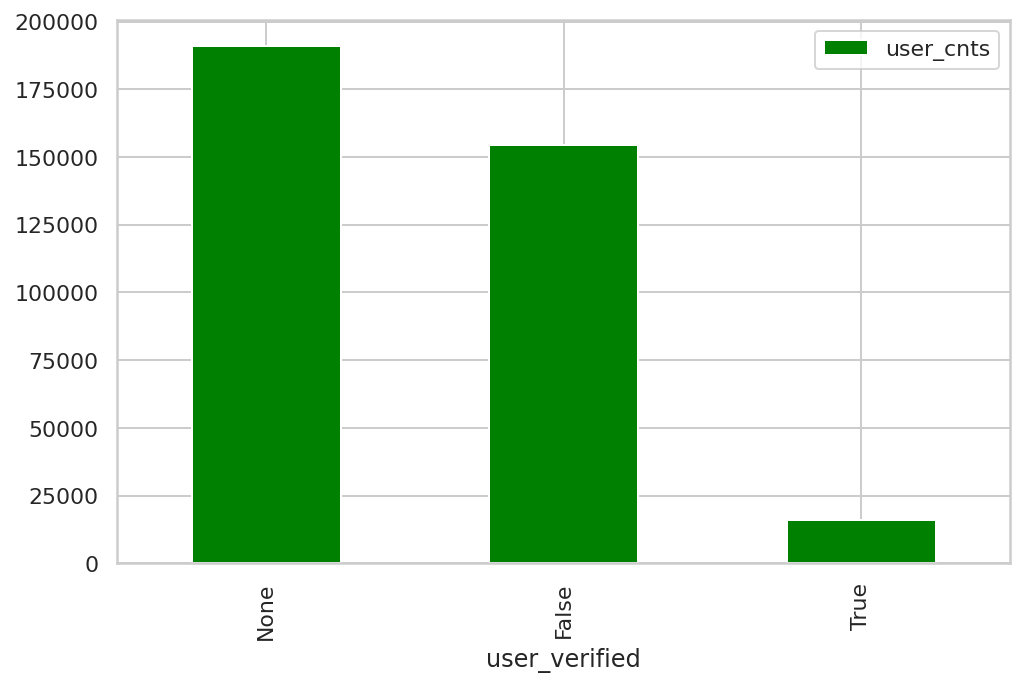

In [31]:
df_verified_results.toPandas().plot.bar(x='user_verified', y='user_cnts', figsize=(8, 5), color='green')

# Need to work on plt to enhance bar chart !!!

In [32]:
type(df_verified_results)
df_verified_results_renamed = df_verified_results

# We assign the rest of 'null' belong to another specific group that we call 'others'
others = {
      'user_verified': 'others'
    , 'Users count': df_verified_results_renamed['user_cnts']
}

pyspark.sql.dataframe.DataFrame

In [33]:
#df_verified_results_renamed = df_verified_results_renamed.append(others, ignore_index=True)
#fig, axs = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.8))


#plot0 =   axs.bar(x=df_verified_results_renamed['user_verified'],
#                  height=df_verified_results_renamed['user_cnts'])
#title0 =  axs.set_title('Users counts by Verification', fontsize = 'small')
#xlabel0 = axs.set_xlabel('User Verified', fontsize = 'small')
#ylabel0 = axs.set_ylabel('Users Counts', fontsize = 'small')
#xsticks_label = axs.set_xticklabels(df_verified_results_renamed['user_verified'] 
 #                                      ,rotation = 'vertical', fontsize='small')

# Dealing with Missing Values

#Replace 0 for null for all integer columns

df.na.fill(value=0).show()

#Replace 0 for null on only population column 

df.na.fill(value=0,subset=["population"]).show()

#PySpark Replace Null/None Value with Empty String

df.na.fill("").show(false) # This replaces all String type columns with empty/blank string for all NULL values.

df.na.fill({"city": "unknown", "type": ""}) \
    .show()
    
df.na.fill("unknown",["city"]) \
    .na.fill("",["type"]).show()

# TextBlob Sentiment Analysis


TextBlob’s sentiment analysis processing employs two key metrics: polarity and subjectivity.
##### The polarity score is a float within the range [-1.0, 1.0], and it reflects the emotional charge of a statement or passage.
##### Subjectivity is a float within the range [0.0, 1.0], where 0.0 is very objective and 1.0 is very subjective. 

In [34]:
TextBlob("So excited to get my vaccine!").sentiment
TextBlob("I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer").sentiment

text = u'So excited to get my vaccine! \U0001f602'
text
TextBlob(text).sentiment


text = u'This dog \U0001f602'
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

Sentiment(polarity=0.46875, subjectivity=0.75)

Sentiment(polarity=0.4375, subjectivity=0.875)

'So excited to get my vaccine! 😂'

Sentiment(polarity=0.46875, subjectivity=0.75)

This dog 😂
This dog 


In order to define a udf, you need to specify the output data type. For instance, if you wanted to apply a function my_func that returned a string, you could create a udf as follows:

import pyspark.sql.functions as f

my_udf = f.udf(my_func, StringType())

df = df.withColumn('new_column', my_udf(f.col("some_column_name")))

Apply is only for pandas dataframe, not spark dataframe

# Preprocessing Text column

### Replace null value with empty string 


In [35]:
#df_vaccine_tweets.select('text').show()

#df_vaccine_tweets.select('text').orderBy(col("text").asc()).toPandas().head(3)

#df = df_vaccine_tweets.select('text').na.fill({"text": "no comment"}).toPandas() # pandas dataframe
df = df_vaccine_tweets.select('text').na.fill({"text": "no comment"})

In [36]:
# Function to get sentiment

def apply_blob(text):
    try: 
        return TextBlob(text).sentiment
    except:
        return None

# After that we will register the function as a Spark UDF:
myudf = udf(apply_blob, DoubleType())

# Then to apply the function to the whole dataframe we need to write:
#df_new = df.withColumn('sentiment', myudf(F.col("text"))).show()  # has to do with partition, spark workers partitionColumn, lowerBound, upperBound, numPartitions

In [37]:
#sentiment = udf(lambda x: TextBlob(x).sentiment[0])
#spark.udf.register('sentiment', sentiment)
#tweets = df.withColumn('sentiment',sentiment('text').cast('double'))
#tweets

Explore Function Reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.explode.html#:~:text=explode%20(col)%5Bsource%5D,the%20map%20unless%20specified%20otherwise.

In [38]:
from pyspark.sql import Row
eDF = spark.createDataFrame([Row(a=1, intlist=[1,2,3], mapfield={"a": "b"})])
eDF

DataFrame[a: bigint, intlist: array<bigint>, mapfield: map<string,string>]

In [39]:
df = eDF.select(explode(eDF.intlist).alias("anInt")).collect()
df
eDF.select(explode(eDF.mapfield).alias("key", "value")).show()

[Row(anInt=1), Row(anInt=2), Row(anInt=3)]

+---+-----+
|key|value|
+---+-----+
|  a|    b|
+---+-----+



# WebScraping (BeautifulSoup) 

## Amazon Customer Review -- Method 1

In [4]:
search_query = "nike+shoes+men"
base_url = "https://www.amazon.in/s?k="

In [5]:
url = base_url+search_query
url

'https://www.amazon.in/s?k=nike+shoes+men'

## Step 1: Add User-Agents and Referer when sending request to Amazon

Ref: https://www.geeksforgeeks.org/http-headers-referer/#:~:text=To%20check%20the%20Referer%20in,Google%20Chrome

In [6]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36', 'referer' :'https://www.amazon.com/'}

In [7]:
search_response=requests.get(url, headers=header)

In [8]:
search_response.status_code

200

In [35]:
#search_response.text

In [10]:
cookie=search_response.cookies # can assign to a cookie object to stay away from blocking 

## Step 2: Function to get the content of the page of required query 

### A function is used to get the page content and status code for the required query. A status code 200 is required to continue with the process.

In [11]:
#cookie={} #insert request cookies within(); only used if Amazon blocks content you requested

def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,cookies=cookie, headers=header)
    if page.status_code==200:
        return page
    else:
        return page.reason # text #status_code

In [12]:
getAmazonSearch('nike+shoes+men')

https://www.amazon.com/s?k=nike+shoes+men


<Response [200]>

## Step 3: Function to get the contents of individual product pages using 'data-asin' number (Amazon's unique identification number)

In [13]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin # this will take you to the page of that particular product
    print(url)
    page=requests.get(url, cookies =cookie, headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [14]:
Searchasin("B07Y84WX3F")

https://www.amazon.com/dp/B07Y84WX3F


<Response [200]>

## Step 4: Functions to pass on the link of 'see all customer reviews' and extract the content

In [15]:
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link # this will take you to the page of that particular product
    print(url)
    page=requests.get(url, cookies =cookie, headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

## Step 5: Get First Page Product Review Extraction

In [16]:
product_names = [] # create empty list to store all product names
response = getAmazonSearch('nike+shoes+men')
soup = BeautifulSoup(response.content)
for i in soup.findAll("span",{'class': 'a-size-base-plus a-color-base a-text-normal'}): # find this tag by 'inspecting' on the product name which will be common for all the product on that page
     product_names.append(i.text) # adding the product names to the list

https://www.amazon.com/s?k=nike+shoes+men


In [32]:
#product_names

In [18]:
len(product_names)

64

## Step 6: Method of Extracting 'data-asin' numbers are similar to that of product names. Only the tag details have to be changed in findall()

In [19]:
data_asin=[] # create empty list to store all the asin number 
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
# search 'data-asin; in search bar and from there, you can see class (should be the same for all products on that page)
for i in soup.findAll("div", {'class': "sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=nike+shoes+men


In [20]:
response.status_code

200

In [33]:
#data_asin

In [22]:
len(data_asin)

48

## Step 7: By passing the data-asin numbers, we can extract the 'see all customer reviews' link for each product in the page 

In [23]:
links= [] # create an empty list to store review links

for i in range(len(data_asin)):
    response=Searchasin(data_asin[i]) # use above defined asin function to loop each asin 48 times
    soup=BeautifulSoup(response.content)
    #'inspect' on the 'see all review'
    for i in soup.findAll("a", {'data-hook': "see-all-reviews-link-foot"}): 
        links.append(i['href'])

https://www.amazon.com/dp/B07NLC4K3S
https://www.amazon.com/dp/B07RDMCC5G
https://www.amazon.com/dp/B07RDMBC5L
https://www.amazon.com/dp/B08GJ43LTF
https://www.amazon.com/dp/B07RFNMHL5
https://www.amazon.com/dp/B07H8HZ38D
https://www.amazon.com/dp/B01CB0NXGO
https://www.amazon.com/dp/B00XWNW11I
https://www.amazon.com/dp/B00770CAOA
https://www.amazon.com/dp/B07Y84WX3F
https://www.amazon.com/dp/B06X9BMJG2
https://www.amazon.com/dp/B095MHQV31
https://www.amazon.com/dp/B00Q6ZC7PY
https://www.amazon.com/dp/B08JLRYT26
https://www.amazon.com/dp/B07RGM63KN
https://www.amazon.com/dp/B078HR7VJM
https://www.amazon.com/dp/B07MVPX37T
https://www.amazon.com/dp/B013Y6PJZM
https://www.amazon.com/dp/B071K77K9Y
https://www.amazon.com/dp/B083FR5WFB
https://www.amazon.com/dp/B07HGC1B9V
https://www.amazon.com/dp/B07QQSXLBK
https://www.amazon.com/dp/B08HR8HNSX
https://www.amazon.com/dp/B08Q8RLYYC
https://www.amazon.com/dp/B08QB4FZ6J
https://www.amazon.com/dp/B07HDST9S8
https://www.amazon.com/dp/B0784PBPQ3
h

In [24]:
len(links)
links[0]

95

'/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

## Step 8: Now we have the 'see all review' links. Using this link along with a page number, we can extract the reviews in any number of pages for all the products 

In [25]:
#links
#for j in range(len(links)):
 #   print(links[j])

#### Solution -- AttributeError: 'str' object has no attribute 'content'

https://stackoverflow.com/questions/60575687/how-to-fix-for-the-attributeerror-str-object-has-no-attribute-content-pyt

In [26]:
reviews=[]
for j in range(len(links)):
    # insert how many page of review you'd like to loop
    for k in range(2):
        response=Searchreviews(links[j]+'&pageNumber='+ str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span", {'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Revolution-Wide-Running/product-reviews/B085LTY56B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Mens-Monarch-Cross-Train

https://www.amazon.com/Nike-Mens-Killshot-Leather-Sneaker/product-reviews/B086H3GG86/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Killshot-Leather-Sneaker/product-reviews/B086H3GG86/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-CI9981-003-Mens-Running-Shoe/product-reviews/B08695BVVR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-CI9981-003-Mens-Running-Shoe/product-reviews/B08695BVVR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-CI9981-003-Mens-Running-Shoe/product-reviews/B08695BVVR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-CI9981-003-Mens-Running-Shoe/product-reviews/B08695BVVR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-CI9981-003-Mens-Runnin

https://www.amazon.com/NIKE-Air-Force-Mens-Trainers/product-reviews/B00UBN6G0O/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/NIKE-Air-Force-Mens-Trainers/product-reviews/B00UBN6G0O/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/NIKE-Air-Force-Mens-Trainers/product-reviews/B00UBN6G0O/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/NIKE-Mens-2018-Running-Shoe/product-reviews/B000M5CRC2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/NIKE-Mens-2018-Running-Shoe/product-reviews/B000M5CRC2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/NIKE-Mens-2018-Running-Shoe/product-reviews/B000M5CRC2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/NIKE-Mens-2018-Running-Shoe/product-reviews/B000M5CRC2/ref=cm_

https://www.amazon.com/Nike-AH8050-Mens-Gymnastics-Shoes/product-reviews/B07FCQGVJF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-AH8050-Mens-Gymnastics-Shoes/product-reviews/B07FCQGVJF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-AH8050-Mens-Gymnastics-Shoes/product-reviews/B07FCQGVJF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Torch-Mens-Running-Shoes/product-reviews/B07C5FL5PJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Torch-Mens-Running-Shoes/product-reviews/B07C5FL5PJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Torch-Mens-Running-Shoes/product-reviews/B07C5FL5PJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Torch-Mens-Running-Shoes/product-rev

https://www.amazon.com/Nike-AA7403-Mens-Running-Shoes/product-reviews/B07G8GZ2XF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-AA7403-Mens-Running-Shoes/product-reviews/B07G8GZ2XF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-AA7403-Mens-Running-Shoes/product-reviews/B07G8GZ2XF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-AA7403-Mens-Running-Shoes/product-reviews/B07G8GZ2XF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-687977-Mens-Low-Top-Sneakers/product-reviews/B081KMGGKM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-687977-Mens-Low-Top-Sneakers/product-reviews/B081KMGGKM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-687977-Mens-Low-Top-Sneakers/product

https://www.amazon.com/Nike-Mens-Gymnastics-Shoes/product-reviews/B08XPN34KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Gymnastics-Shoes/product-reviews/B08XPN34KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Mens-Gymnastics-Shoes/product-reviews/B08XPN34KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Mens-Gymnastics-Shoes/product-reviews/B08XPN34KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Nike-Mens-Gymnastics-Shoes/product-reviews/B08XPN34KK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Nike-Precision-Basketball-Shoes-CW3403-002/product-reviews/B096HXT1F3/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Nike-Precision-Basketball-Shoes-CW3403-002/product-revi

In [27]:
len(reviews)

2826

## Step 9: Place Reviews in Data Frame and Export to CSV in Directory

In [28]:
rev={'reviews': reviews} #building dictionary 
review_data = pd.DataFrame.from_dict(rev) # create pd dataframe out of reviews
pd.set_option('max_colwidth', 800) #how wide the column is

In [29]:
review_data.head(5)
review_data.shape

,reviews
0,"\n\n First off, these shoes are insanely comfortable, and fit perfectly. However, the ""bubble"" traction pattern on the bottom of the shoe makes a loud snap / pop when you walk, at literally the volume of popping bubble packaging. Numerous people have commented on this, it's completely unmistakable. This goes for nearly all surfaces. Really odd design choice, or maybe it was just my size (12.5).\n\n"
1,"\n\n I’m not a marathon runner and in fact I’m far from it, run about 2 miles 4-5 days a week and was looking to replace my current new balances but wanted to try something new because all I buy are NB’s. These shoes, to me, were stunning. Minute I put them on, felt comfortable, light, but the sole is deceivingly thick. But not so much that it feels like your trucking around in some basketball shoes. These also on an aesthetic level...god do they pop. I knew they were fresh as hell the moment I put them on but I got 5 compliments the first day I wore these around just to break them in. Probably going to get another pair just for walking around. I’m not some expert runner so there may be flaws to my untrained eye but I am beyond impressed with these. I go around to different brands wit..."
2,\n\n I dont know if the JV in the label means something but these shoes DID NOT FIT!! I bought them for my boyfriend as a bday gift. I doubled checked his other pairs of sneakers and they all are 8.5Shoes were too small! It hurt his toes when he tried them on. I want to return them for refund but I am not im the US at the moment and my deadline is Feb 23.\n\n
3,\n\n One shoe had a loud smack every time my son walked. Like it was suctioning down to the floor. We even put tape at the bottOm to pin point area And it continued doing it. Waiting on replacement I do not know if I will be billed twice as my son took shoes to dads house and have them a good wear down in 3 days and he never told me about problem till he was home\n\n
4,"\n\n Coming from nike air pegasus and air vomeros...which were nice, this one does not have any Nike air unit. But for casual walking the dog etc, these are perfect at 1/3 the price of the high end premium nikes. The best pro about this shoe is the nike heel lock design that was also included on the Air Vomeros...best design for the heel in my opinion(easy to slip on and stays locked down in place while running or walking). Can't wait to see what the Revolution 6 will look like.\n\n"


In [31]:
review_data.to_csv('/home/AC27802/Scraping_Amazon_reviews.csv', index=False) #converting the dataframe to a csv file in the home directory

## Amazon Customer Review -- Method 2

### Reference:
https://www.fullstaxx.com/2021/05/12/scraping-amazon-python/

https://www.youtube.com/watch?v=5secVgADRpA

# Zillow Housing Scraping

## Step 1: Add User-Agents and Referer when sending request to Web Page

In [19]:
header={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36', 'Referer': 'https://63c073113b7dc61aebc39f05a71f403c.safeframe.googlesyndication.com/'}

In [20]:
url='https://www.zillow.com/homes/Denver,-CO_rb/'

In [21]:
willow_html = requests.get(url=url, headers=header)
willow_html.status_code

200

In [22]:
cookie=willow_html.cookies # can assign to a cookie object to stay away from blocking 

In [23]:
willow_html = requests.get(url=url, cookies=cookie, headers=header)
willow_html.status_code

200

In [24]:
bsojb = BeautifulSoup(willow_html.content, 'lxml')
bsojb

<html><head><meta content="noindex, nofollow" name="robots"/><link href="https://www.zillowstatic.com/vstatic/80d5e73/static/css/z-pages/captcha.css" media="screen" rel="stylesheet" type="text/css"/><script>
        window._pxAppId = 'PXHYx10rg3';
        window._pxJsClientSrc = '/HYx10rg3/init.js';
        window._pxHostUrl = '/HYx10rg3/xhr';
        window._pxFirstPartyEnabled = true;
        window._pxreCaptchaTheme='light';
    </script><script src="https://captcha.px-cdn.net/PXHYx10rg3/captcha.js?a=c&amp;m=0" type="text/javascript"></script>
<script>
        function getQueryString(name, url) {
            if (!url) url = window.location.href;
            name = name.replace(/[\[\]]/g, "\\$&");
            var regex = new RegExp("[?&]" + name + "(=([^&#]*)|&|#|$)"),
                results = regex.exec(url);
            if (!results) return null;
            if (!results[2]) return '';
            return decodeURIComponent(results[2].replace(/\+/g, " "));
        }
        documen

In [ ]:
 #https://www.youtube.com/watch?v=pzptMqULnyE